Keep in mind that the actual computation of the answers for least squares is very simple.  A lot of what is going on in this code is archiving the examples from class and graphing them.

First, the preamble is a little different from usual.  The extra stuff is to facilitate the graphs.  If you're just out to solve stuff, it's not needed.

In [1]:
import numpy as np
from numpy import linalg
from sympy import *
import matplotlib.pyplot as plt
# %matplotlib inline
init_printing(pretty_print=True, use_latex=True)
from scipy.linalg import norm



Next, some simple examples as I did in class.  I have a very basic if statement set up to check to see if the matrix in the normal equations is invertible or not.  Please be aware that it's only set up for the small systems we've done.  You'd need to adjust it for something larger.



In [ ]:
#A = Matrix([[1,-1],[0,2],[2,-1]])
#b = Matrix([[3],[-1],[2]])
# A = Matrix([[1,2],[-2,-4],[1,2]])
# b = Matrix(3,1,[1,1,3])
A = Matrix(5,2,[1,3.78,1,4.11,1,4.39,1,4.73,1,4.88])
b = Matrix(5,1,[91,98,103,110,112])
display(A)
display(b)
AA = A.T*A
print("AA")
display(AA)
bb = A.T*b
print("bb")
display(bb)
if AA.det() != 0:
    xhat=AA.solve(bb,method='GJ')
    print("xhat")
    display(xhat)
    print("xhat.evalf()")
    display(xhat.evalf())
    print("A*xhat")
    display(A*xhat)
    print("error")
    display((b-A*xhat).norm())
    A.solve_least_squares(b)
else:
    C = AA.col_insert(4,bb)
    display(C)
    display(Matrix.rref(C,pivots=false))



⎡1  3.78⎤
⎢       ⎥
⎢1  4.11⎥
⎢       ⎥
⎢1  4.39⎥
⎢       ⎥
⎢1  4.73⎥
⎢       ⎥
⎣1  4.88⎦

⎡91 ⎤
⎢   ⎥
⎢98 ⎥
⎢   ⎥
⎢103⎥
⎢   ⎥
⎢110⎥
⎢   ⎥
⎣112⎦

AA


⎡  5     21.89 ⎤
⎢              ⎥
⎣21.89  96.6399⎦

bb


⎡  514  ⎤
⎢       ⎥
⎣2265.79⎦

xhat


⎡18.5642101604027⎤
⎢                ⎥
⎣19.2407011968016⎦

xhat.evalf()


⎡18.5642101604027⎤
⎢                ⎥
⎣19.2407011968016⎦

A*xhat


⎡91.2940606843127⎤
⎢                ⎥
⎢97.6434920792572⎥
⎢                ⎥
⎢103.030888414362⎥
⎢                ⎥
⎢109.572726821274⎥
⎢                ⎥
⎣112.458832000794⎦

error


Next, I set up the points that I fit to a line, and then a quadratic.  Normally I would just edit the code I've got to adjust which it's doing, but since I want to graph them both on the same figure, I need them both hanging around.  Not saying this is the most efficient way to do this, but it works.



In [5]:
xcoords=Matrix([1,2,3,4,5])
ycoords=Matrix([1,1.5,3,4.5,7])

A=zeros(5,2)
for i in range(0,5):
    A[i,0]=1
    A[i,1]=xcoords[i]
b=ycoords    
display(A)
display(b)
AA = A.T*A
display(AA)
bb = A.T*b
display(bb)
xhat=AA.solve(bb,method='GJ')
display(xhat.evalf(4))
display((A*xhat-b).norm())

samples = 1000 # number of samples across range
x_min = 0
x_max = 5
x = np.linspace(x_min, x_max, samples)
f1 = xhat[0]+xhat[1]*x

A=zeros(5,3)
for i in range(0,5):
    A[i,0]=1
    A[i,1]=xcoords[i]
    A[i,2]=xcoords[i]**2
b=ycoords    
display(A)
display(b)
AA = A.T*A
display(AA)
bb = A.T*b
display(bb)
xhat=AA.solve(bb,method='GJ')
display(xhat.evalf(4))
display((A*xhat-b).norm())

f2 = xhat[0]+xhat[1]*x+xhat[2]*x**2



⎡1  1⎤
⎢    ⎥
⎢1  2⎥
⎢    ⎥
⎢1  3⎥
⎢    ⎥
⎢1  4⎥
⎢    ⎥
⎣1  5⎦

⎡ 1 ⎤
⎢   ⎥
⎢1.5⎥
⎢   ⎥
⎢ 3 ⎥
⎢   ⎥
⎢4.5⎥
⎢   ⎥
⎣ 7 ⎦

⎡5   15⎤
⎢      ⎥
⎣15  55⎦

⎡17.0⎤
⎢    ⎥
⎣66.0⎦

⎡-1.1⎤
⎢    ⎥
⎣1.5 ⎦

⎡1  1  1 ⎤
⎢        ⎥
⎢1  2  4 ⎥
⎢        ⎥
⎢1  3  9 ⎥
⎢        ⎥
⎢1  4  16⎥
⎢        ⎥
⎣1  5  25⎦

⎡ 1 ⎤
⎢   ⎥
⎢1.5⎥
⎢   ⎥
⎢ 3 ⎥
⎢   ⎥
⎢4.5⎥
⎢   ⎥
⎣ 7 ⎦

⎡5   15   55 ⎤
⎢            ⎥
⎢15  55   225⎥
⎢            ⎥
⎣55  225  979⎦

⎡17.0 ⎤
⎢     ⎥
⎢66.0 ⎥
⎢     ⎥
⎣281.0⎦

⎡  0.9  ⎤
⎢       ⎥
⎢-0.2143⎥
⎢       ⎥
⎣0.2857 ⎦

Next is the graph.  Nothing too special going on here.  It plots the linear function, the quadratic, and then the individual points.



In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(x, f1, label="Linear Interpolant")
plt.plot(x, f2, label="Quadratic Interpolant")

plt.scatter(xcoords, ycoords, label='Set of Points')

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(loc='upper left',prop={'size':10})
plt.title('Scatter plot mixed with function')

plt.grid(which='major', alpha=0.25)
plt.grid(which='minor', alpha=0.0625)
plt.minorticks_on()
plt.show()



Next the set of ten points which I approximated with sines and cosines and then a cubic polynomial.  I also briefly changed the cubic to a quintic.  Be aware that if you do that, you also have to change the size of the A matrix when you initiate it.



In [ ]:
xcoords=zeros(10,1)
for i in range(0,10):
    xcoords[i]=1+0.5*i
ycoords=Matrix([1.5,3,3.5,3,2,1,-1,-2.5,-3.5,-3.5])

A=zeros(10,2)
for i in range(0,10):
    A[i,0]=cos(xcoords[i])
    A[i,1]=sin(xcoords[i])
b=ycoords    
display(A)
display(b)
AA = A.T*A
display(AA)
bb = A.T*b
display(bb)
xhat=AA.solve(bb,method='GJ')
display(xhat.evalf())
display(((A*xhat-b).norm()**2).evalf())
#A.solve_least_squares(b)

samples = 1000 # number of samples across range
x_min = 0
x_max = 6
x = np.linspace(x_min, x_max, samples)
f1 = xhat[0]*np.cos(x)+xhat[1]*np.sin(x)

A=zeros(10,4)
for i in range(0,10):
    #A[i,0]=cos(xcoords[i])
    #A[i,1]=sin(xcoords[i])
    A[i,0]=1
    A[i,1]=xcoords[i]
    A[i,2]=xcoords[i]**2
    A[i,3]=xcoords[i]**3
    #A[i,4]=xcoords[i]**4
    #A[i,5]=xcoords[i]**5
b=ycoords    
display(A)
display(b)
AA = A.T*A
display(AA)
bb = A.T*b
display(bb)
xhat=AA.solve(bb,method='GJ')
display(xhat.evalf())
display(((A*xhat-b).norm()**2).evalf())

f2=xhat[0]+xhat[1]*x+xhat[2]*x**2+xhat[3]*x**3#+xhat[4]*x**4+xhat[5]*x**5



And finally the graph for these points.



In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(x, f1)
plt.plot(x, f2)

plt.scatter(xcoords, ycoords, label='Set of Points')

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(loc='upper left',prop={'size':10})

plt.grid(which='major', alpha=0.25)
plt.grid(which='minor', alpha=0.0625)
plt.minorticks_on()
plt.show()



hw problem

A


⎡4   16    64 ⎤
⎢             ⎥
⎢6   36   216 ⎥
⎢             ⎥
⎢8   64   512 ⎥
⎢             ⎥
⎢10  100  1000⎥
⎢             ⎥
⎢12  144  1728⎥
⎢             ⎥
⎢14  196  2744⎥
⎢             ⎥
⎢16  256  4096⎥
⎢             ⎥
⎣18  324  5832⎦

b


⎡1.58⎤
⎢    ⎥
⎢2.08⎥
⎢    ⎥
⎢2.5 ⎥
⎢    ⎥
⎢2.8 ⎥
⎢    ⎥
⎢3.1 ⎥
⎢    ⎥
⎢3.4 ⎥
⎢    ⎥
⎢3.8 ⎥
⎢    ⎥
⎣4.32⎦

AA


⎡ 1136    16192    245312 ⎤
⎢                         ⎥
⎢16192   245312   3866368 ⎥
⎢                         ⎥
⎣245312  3866368  62617856⎦

bb


⎡ 290.16 ⎤
⎢        ⎥
⎢4025.44 ⎥
⎢        ⎥
⎣60075.84⎦

xhat


⎡ 0.5132 ⎤
⎢        ⎥
⎢-0.03348⎥
⎢        ⎥
⎣0.001016⎦

error


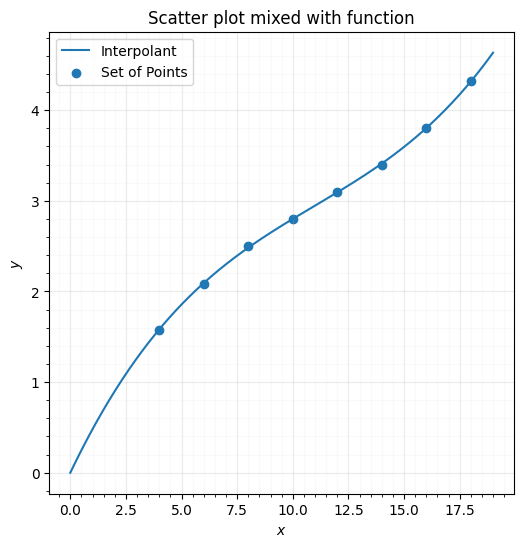

In [19]:
xcoords=Matrix([4,6,8,10,12,14,16,18])
ycoords=Matrix(8, 1,[1.58,2.08,2.5,2.8,3.1,3.4,3.8,4.32])

A=zeros(8,3)
for i in range(0,8):
    A[i,0]=xcoords[i]
    A[i,1]=xcoords[i]**2
    A[i,2]=xcoords[i]**3
b=ycoords
print("A")
display(A)
print("b")
display(b)
AA = A.T*A
print("AA")
display(AA)
bb = A.T*b
print("bb")
display(bb)
xhat=AA.solve(bb,method='GJ')
print("xhat")
display(xhat.evalf(4))
print("error")
display((A*xhat-b).norm())

samples = 10000 # number of samples across range
x_min = 0
x_max = 19
x = np.linspace(x_min, x_max, samples)
f1 = xhat[0]*x+xhat[1]*x**2+xhat[2]*x**3

# A=zeros(5,3)
# for i in range(0,5):
#     A[i,0]=1
#     A[i,1]=xcoords[i]
#     A[i,2]=xcoords[i]**2
# b=ycoords    
# display(A)
# display(b)
# AA = A.T*A
# display(AA)
# bb = A.T*b
# display(bb)
# xhat=AA.solve(bb,method='GJ')
# display(xhat.evalf(4))
# display((A*xhat-b).norm())

# f2 = xhat[0]+xhat[1]*x+xhat[2]*x**2

plt.figure(figsize=(6, 6))
plt.plot(x, f1, label="Interpolant")
# plt.plot(x, f2, label="Quadratic Interpolant")

plt.scatter(xcoords, ycoords, label='Set of Points')

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(loc='upper left',prop={'size':10})
plt.title('Scatter plot mixed with function')

plt.grid(which='major', alpha=0.25)
plt.grid(which='minor', alpha=0.0625)
plt.minorticks_on()
plt.show()